# **Logistic Regression from Scratch**

## ***Importing Necessary Libraries***

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

## ***Creating the Dataset***

In [22]:
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)

In [23]:
print('Input  :')
print(X)
print('Output :')
print(y)

Input  :
[[-1.04948638  0.8786438 ]
 [ 0.8780991   0.89551051]
 [ 0.95928819  1.03967316]
 [-1.18013412  1.12062155]
 [-0.90731836  1.06040861]
 [-0.62754626  1.37661405]
 [ 0.82178321  1.18947778]
 [-1.20376927  0.78801845]
 [ 0.77151441  0.345716  ]
 [-0.493857    1.66752297]
 [ 1.17456965  0.69211449]
 [ 0.82798737  0.84806927]
 [ 0.89189141  0.87699465]
 [ 0.90394545  0.35413361]
 [ 0.94459507  1.12641981]
 [ 0.9317172   0.78344054]
 [-0.96853969  1.27991386]
 [-1.09230828  0.92686981]
 [-0.68243019  1.4468218 ]
 [-0.76045809  0.61363671]
 [-1.1146902   1.13545112]
 [ 1.32970299  1.58463774]
 [-1.39003042  0.85771953]
 [ 1.01313574  1.16777676]
 [ 1.22382712  1.98519313]
 [-1.20257258  0.69174373]
 [ 0.96435056  1.77547698]
 [ 1.02600767  0.87226739]
 [ 1.10863359  1.16755486]
 [-0.84967187  0.88838944]
 [-1.03048932  0.61839045]
 [-1.278618    0.98379959]
 [-0.98437725  0.93621125]
 [ 0.91588404  0.79032389]
 [ 1.13872896  0.85729649]
 [-1.01366961  0.47330777]
 [ 0.84917607  1.36

## ***Visualizing the Dataset***

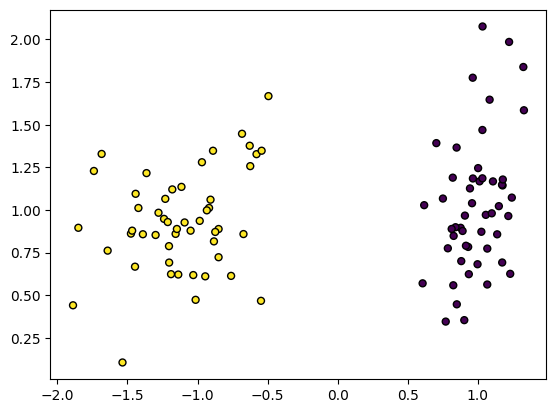

In [24]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.show()

## ***Defining Function for Normalizing the Input Data***

In [25]:
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

## ***Defining Sigmoid Function***

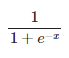

In [26]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

## ***Defining the Cost/Loss Function - [Log-Loss Function]***

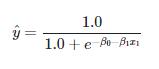

In [27]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

## ***Defining Gradient Descent***

In [28]:
def gradients(X, y, y_hat):
    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

## ***Defining Function for Plotting Decision Boundary***

In [29]:
def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.plot(x1, x2, 'y-')

## ***Defining the Function for Training***

In [30]:
def train(X, y, bs, epochs, lr):
    
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

## ***Performing Training***

In [31]:
# Training 
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.01)

## ***Visualizing the Result***

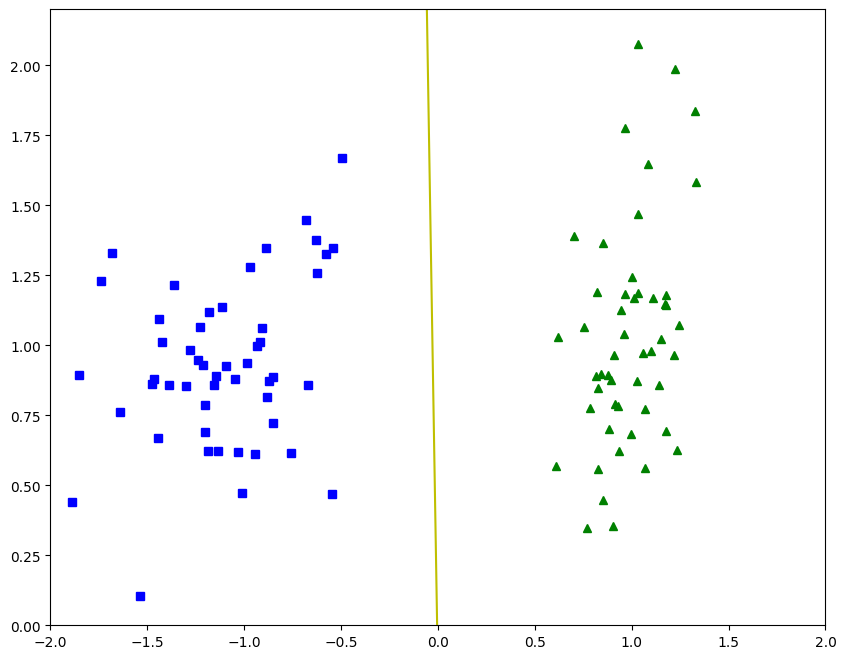

In [32]:
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)